In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fasion_mnist = keras.datasets.fashion_mnist
(x_trian , y_train ) , (x_test , y_test) = fasion_mnist.load_data()

In [3]:
print(f"The x_train size :: {x_trian.shape}\nthe Y_train size :: {y_train.shape}\n********************")
print(f"The x_test size :: {x_test.shape}\nthe Y_test size :: {y_test.shape}\n********************")

The x_train size :: (60000, 28, 28)
the Y_train size :: (60000,)
********************
The x_test size :: (10000, 28, 28)
the Y_test size :: (10000,)
********************


In [4]:
classes_naes = ["T_shrit/top" , "Trouser" , "Pullover" ,"Dres" ,"Coat" 
                , "Sandel" , "SHirt" , "Snaker" , "Bag" , "Ankel_boort"]

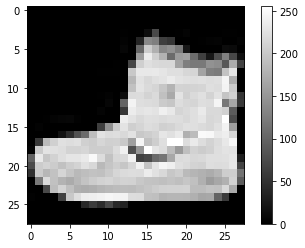

In [5]:
plt.figure()
plt.imshow(x_trian[0] , cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
x_trian , x_test = x_trian /255 , x_test /255

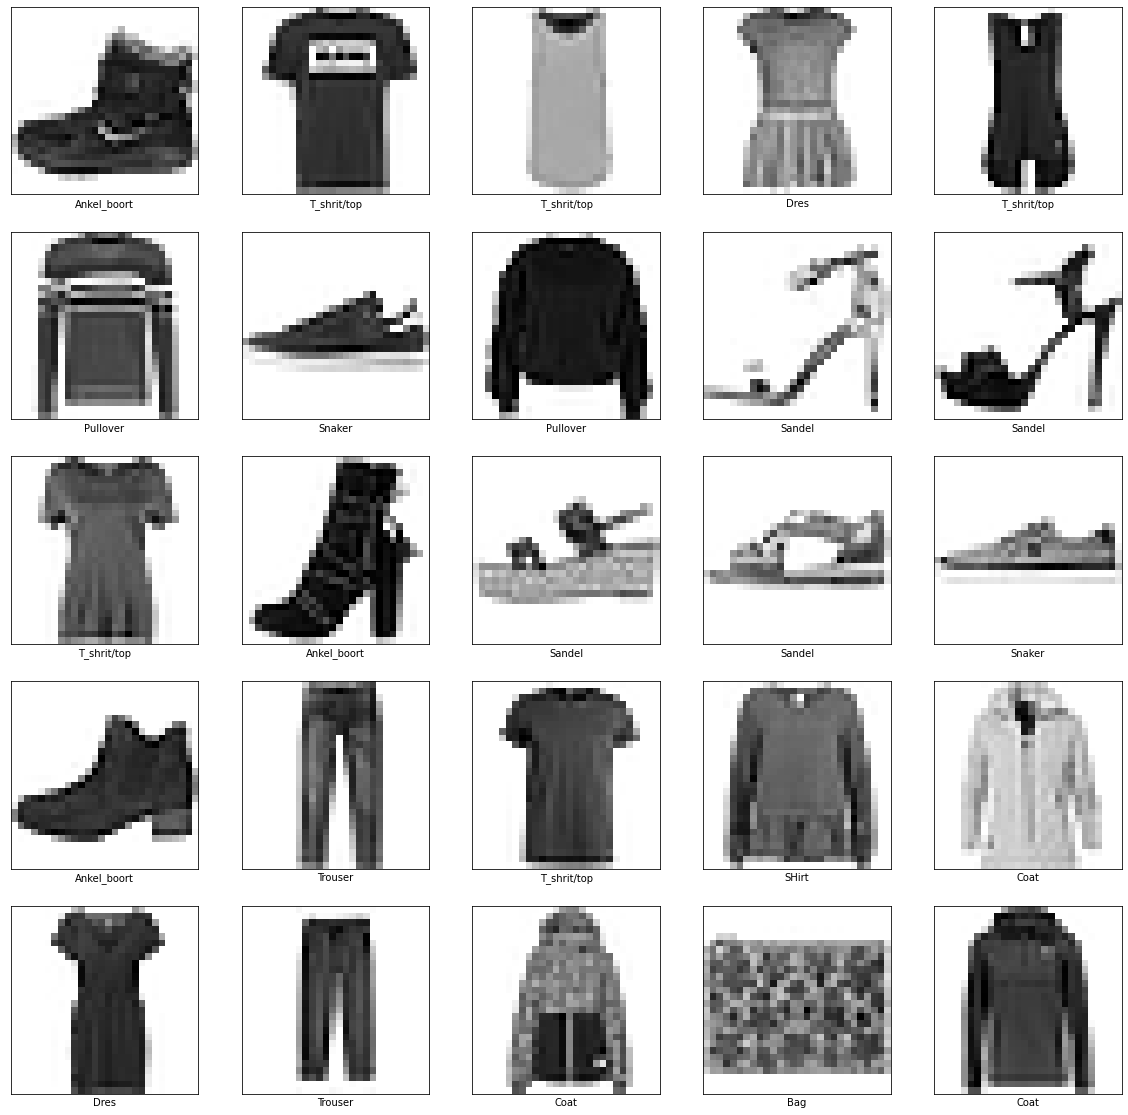

In [7]:
plt.figure(figsize=(20,20))
for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_trian[i] , cmap="gray")
    plt.xlabel(classes_naes[y_train[i]])
plt.show()

In [8]:
Model = keras.models.Sequential([
    keras.layers.Flatten() ,
    keras.layers.Dense(128 , activation = tf.nn.relu) ,
    keras.layers.Dense(10 , activation = tf.nn.softmax)
])

In [9]:
Model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [10]:
Model.fit(x_trian , y_train , epochs=8)


Epoch 1/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5047 - accuracy: 0.8227
Epoch 2/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8630
Epoch 3/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8766
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3144 - accuracy: 0.8856
Epoch 5/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2970 - accuracy: 0.8918
Epoch 6/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2811 - accuracy: 0.8952
Epoch 7/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2681 - accuracy: 0.9000
Epoch 8/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9043


In [11]:
val_loss , val_acc = Model.evaluate(x_test , y_test)

313/313 [==============================] - 2s 1ms/step - loss: 0.3453 - accuracy: 0.8776


In [12]:
pred = Model.predict(x_test)
print(pred[0])
print(np.argmax(pred[0]))
print(y_train[0])
print(x_test[0])

[1.92694438e-06 1.01177193e-07 4.90152729e-07 2.24219804e-07
 2.55077509e-07 5.06306707e-04 2.66035249e-06 1.27201695e-02
 9.74806539e-07 9.86766875e-01]
9
9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(classes_naes[predicted_label],
                                100*np.max(predictions_array),
                                classes_naes[true_label]),
                                color=color)
    


In [22]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
  

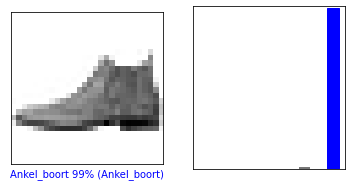

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred,  y_test)
plt.show()

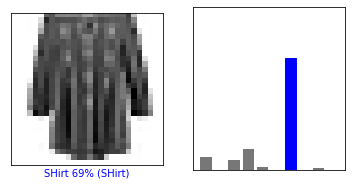

In [33]:
i = 512
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred,  y_test)
plt.show()

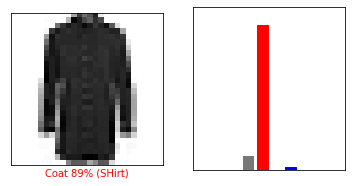

In [34]:
i = 444
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred,  y_test)
plt.show()